In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

GD: Gradient Descent 경사 하강법

고차원 방정식에서 W를 비용함수(RSS)를 이용하여 직관적으로 도출하기 위해.

**경사 하강법은 반복적으로 비용 함수의 반환 값 즉 예측 값과 실제 값의 차이가 작아지는 방향성을 가지고 오류를 감소시키는 방향으로 w를 지속적으로 보정해 간다.**

이때 미분된 1차 함수의 기울기가 최소인 점이 비용함수가 최소인 지점이다.

미분은 수학적으로 증가 혹은 감소의 방향성을 의미. 파라미터들을 다 미분해야하기때문에 편미분을 사용.

이 편미분 된 값에 -LR을 곱하여 기존 값에서 뺀다. (실제값-예측값)

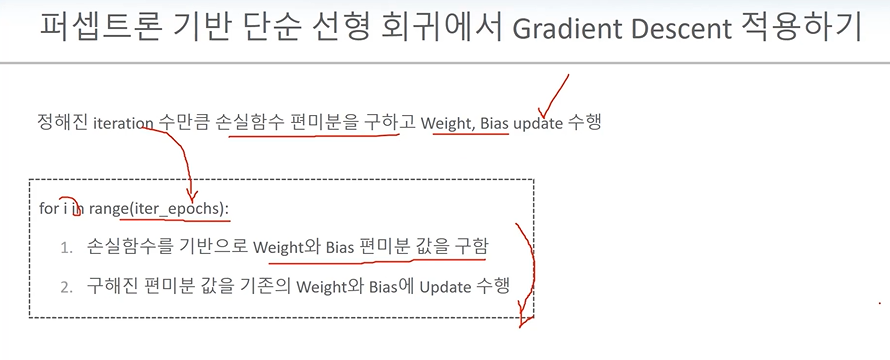
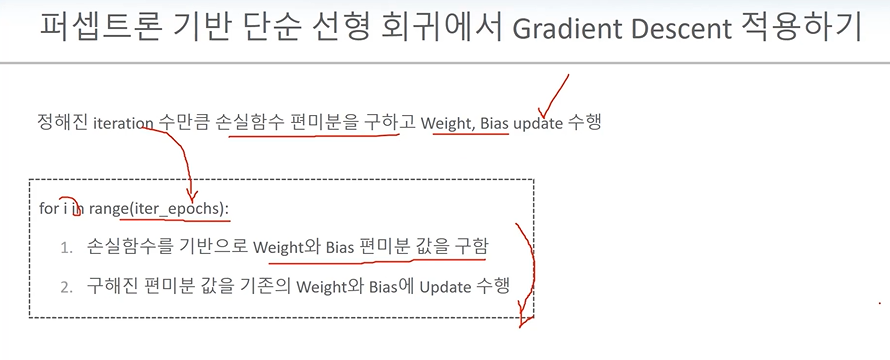